In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('train.csv')

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6000 non-null   object 
 1   Item_Weight                4994 non-null   float64
 2   Item_Fat_Content           6000 non-null   object 
 3   Item_Visibility            6000 non-null   float64
 4   Item_Type                  6000 non-null   object 
 5   Item_MRP                   6000 non-null   float64
 6   Outlet_Identifier          6000 non-null   object 
 7   Outlet_Establishment_Year  6000 non-null   int64  
 8   Outlet_Size                4289 non-null   object 
 9   Outlet_Location_Type       6000 non-null   object 
 10  Outlet_Type                6000 non-null   object 
 11  Item_Outlet_Sales          6000 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 562.6+ KB


In [6]:
df.shape

(6000, 12)

In [7]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,4994.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,12.956536,0.066333,141.228200,1997.840333,2188.996045
std,4.658851,0.051492,62.540569,8.334412,1701.705046
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.895000,0.027030,94.037650,1987.000000,850.892400
50%,12.800000,0.054620,143.197000,1999.000000,1804.650900
75%,17.100000,0.095154,186.522050,2004.000000,3099.964800
max,21.350000,0.328391,266.888400,2009.000000,12117.560000


In [8]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1006
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1711
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
per=df.isnull().sum()*100/len(df)

In [10]:
per

Item_Identifier               0.000000
Item_Weight                  16.766667
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.516667
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [11]:
df.duplicated().any()

False

In [12]:
df["Item_Weight"]

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
5995    20.600
5996     9.195
5997    10.695
5998    15.750
5999    19.600
Name: Item_Weight, Length: 6000, dtype: float64

In [13]:
df["Outlet_Size"]

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
5995       NaN
5996    Medium
5997       NaN
5998     Small
5999     Small
Name: Outlet_Size, Length: 6000, dtype: object

In [14]:
mean_weight=df["Item_Weight"].mean()
median_weight=df["Item_Weight"].median()


In [15]:
print(mean_weight,median_weight)

12.956535843011613 12.8


In [16]:
df["Item_weight_mean"]=df["Item_Weight"].fillna(mean_weight)
df["Item_weight_median"]=df["Item_Weight"].fillna(median_weight)

In [17]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_weight_mean,Item_weight_median
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6000 non-null   object 
 1   Item_Weight                4994 non-null   float64
 2   Item_Fat_Content           6000 non-null   object 
 3   Item_Visibility            6000 non-null   float64
 4   Item_Type                  6000 non-null   object 
 5   Item_MRP                   6000 non-null   float64
 6   Outlet_Identifier          6000 non-null   object 
 7   Outlet_Establishment_Year  6000 non-null   int64  
 8   Outlet_Size                4289 non-null   object 
 9   Outlet_Location_Type       6000 non-null   object 
 10  Outlet_Type                6000 non-null   object 
 11  Item_Outlet_Sales          6000 non-null   float64
 12  Item_weight_mean           6000 non-null   float64
 13  Item_weight_median         6000 non-null   float

In [19]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1006
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1711
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_weight_mean                0
Item_weight_median              0
dtype: int64

In [20]:
print("Original Weight variable variance",df['Item_Weight'].var())
print("Item Weight variance after mean imputation",df['Item_weight_mean'].var())
print("Item Weight variance after median imputation",df['Item_weight_median'].var())

Original Weight variable variance 21.704895357517266
Item Weight variance after mean imputation 18.065101270225526
Item Weight variance after median imputation 18.068521411135407


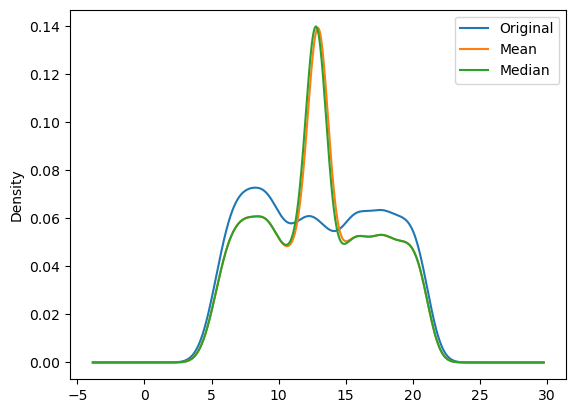

In [21]:
df['Item_Weight'].plot(kind = "kde",label="Original")

df['Item_weight_mean'].plot(kind = "kde",label = "Mean")

df['Item_weight_median'].plot(kind = "kde",label = "Median")

plt.legend()
plt.show()

<AxesSubplot: >

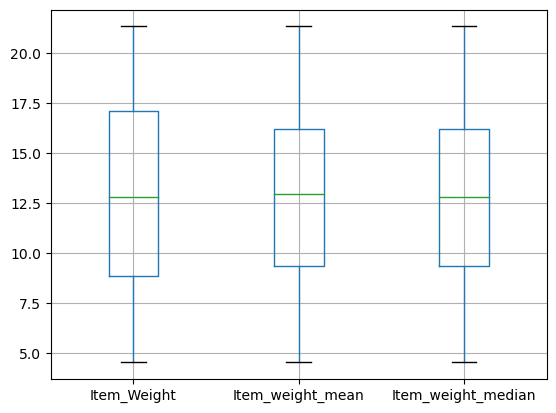

In [22]:
df[['Item_Weight','Item_weight_mean','Item_weight_median']].boxplot()

In [23]:
df['Item_Weight_interploate']=df['Item_Weight'].interpolate(method="linear")

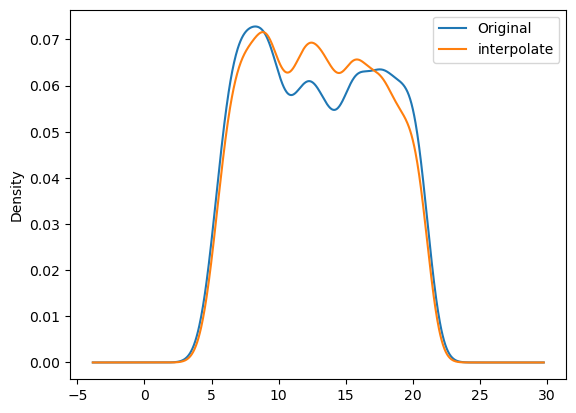

In [24]:
df['Item_Weight'].plot(kind = "kde",label="Original")

df['Item_Weight_interploate'].plot(kind = "kde",label = "interpolate")

plt.legend()
plt.show()

In [25]:
from sklearn.impute import KNNImputer

In [26]:
knn=KNNImputer(n_neighbors=10,weights="distance")
df["Knn_Imputer"]=knn.fit_transform(df[["Item_Weight"]])

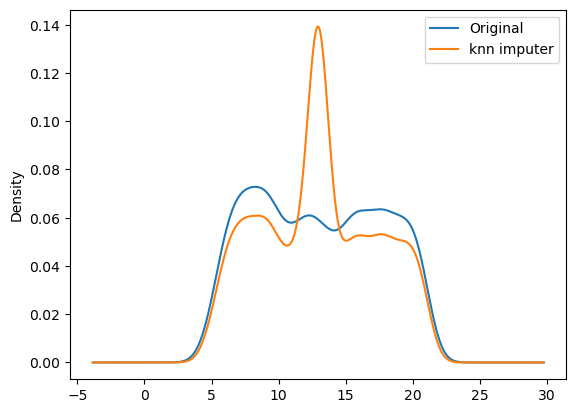

In [27]:
df['Item_Weight'].plot(kind = "kde",label="Original")

df['Knn_Imputer'].plot(kind = "kde",label = "knn imputer")

plt.legend()
plt.show()

In [28]:
df=df.drop(['Item_Weight','Item_weight_mean','Item_weight_median','Knn_Imputer'],axis=1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6000 non-null   object 
 1   Item_Fat_Content           6000 non-null   object 
 2   Item_Visibility            6000 non-null   float64
 3   Item_Type                  6000 non-null   object 
 4   Item_MRP                   6000 non-null   float64
 5   Outlet_Identifier          6000 non-null   object 
 6   Outlet_Establishment_Year  6000 non-null   int64  
 7   Outlet_Size                4289 non-null   object 
 8   Outlet_Location_Type       6000 non-null   object 
 9   Outlet_Type                6000 non-null   object 
 10  Item_Outlet_Sales          6000 non-null   float64
 11  Item_Weight_interploate    6000 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 562.6+ KB


In [30]:
df.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1711
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_interploate         0
dtype: int64

In [31]:
df['Outlet_Size'].value_counts()

Medium    1935
Small     1682
High       672
Name: Outlet_Size, dtype: int64

In [32]:
df['Outlet_Type'].value_counts()

Supermarket Type1    3967
Grocery Store         737
Supermarket Type3     659
Supermarket Type2     637
Name: Outlet_Type, dtype: int64

In [33]:
mode_outlet=df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()))

In [34]:
mode_outlet

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [35]:
missing_values=df['Outlet_Size'].isnull()

In [36]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
5995     True
5996    False
5997     True
5998    False
5999    False
Name: Outlet_Size, Length: 6000, dtype: bool

In [37]:
df.loc[missing_values,'Outlet_Size'] = df.loc[missing_values,'Outlet_Type'].apply(lambda x :mode_outlet[x])

In [38]:
df['Outlet_Size'].isnull().sum()

0

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6000 non-null   object 
 1   Item_Fat_Content           6000 non-null   object 
 2   Item_Visibility            6000 non-null   float64
 3   Item_Type                  6000 non-null   object 
 4   Item_MRP                   6000 non-null   float64
 5   Outlet_Identifier          6000 non-null   object 
 6   Outlet_Establishment_Year  6000 non-null   int64  
 7   Outlet_Size                6000 non-null   object 
 8   Outlet_Location_Type       6000 non-null   object 
 9   Outlet_Type                6000 non-null   object 
 10  Item_Outlet_Sales          6000 non-null   float64
 11  Item_Weight_interploate    6000 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 562.6+ KB


In [40]:
df.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_interploate      0
dtype: int64

In [41]:
df.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interploate'],
      dtype='object')

In [42]:
df["Item_Fat_Content"].value_counts()

Low Fat    3595
Regular    2030
LF          220
reg          81
low fat      74
Name: Item_Fat_Content, dtype: int64

In [43]:
df.replace({'Item_Fat_Content':{'Low Fat':'LF','low fat':'LF','reg':'Regular'}},inplace=True)

In [44]:
df["Item_Fat_Content"].value_counts()

LF         3889
Regular    2111
Name: Item_Fat_Content, dtype: int64

In [45]:
df["Item_Visibility"].value_counts()

0.000000    360
0.076975      3
0.144338      2
0.076841      2
0.059160      2
           ... 
0.079146      1
0.022075      1
0.013091      1
0.076506      1
0.054920      1
Name: Item_Visibility, Length: 5577, dtype: int64

In [46]:
df["Item_Visibility_Interpolate"]=df["Item_Visibility"].replace(0,np.nan).interpolate(method='linear')

In [47]:
df["Item_Visibility_Interpolate"].value_counts()

0.076975    3
0.041355    2
0.058121    2
0.076841    2
0.156308    2
           ..
0.106539    1
0.015310    1
0.041736    1
0.068163    1
0.054920    1
Name: Item_Visibility_Interpolate, Length: 5936, dtype: int64

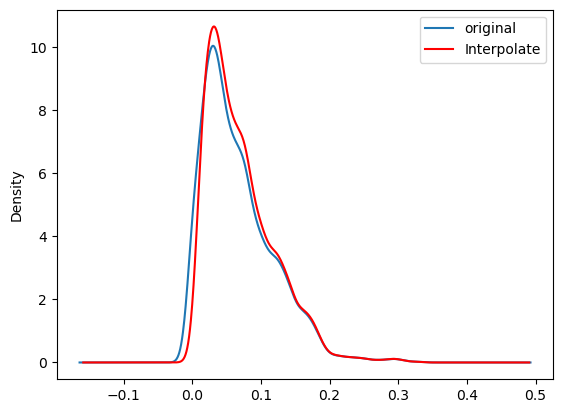

In [48]:
df["Item_Visibility"].plot(kind='kde',label='original')
df["Item_Visibility_Interpolate"].plot(kind='kde',label='Interpolate',color='red')
plt.legend()
plt.show()

In [49]:
df=df.drop("Item_Visibility",axis=1)

In [50]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_Interpolate
0,FDA15,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047
1,DRC01,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278
2,FDN15,LF,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760
3,FDX07,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755
4,NCD19,LF,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751


In [51]:
df['Item_Type'].value_counts()

Fruits and Vegetables    875
Snack Foods              840
Household                643
Frozen Foods             621
Dairy                    487
Canned                   455
Baking Goods             454
Health and Hygiene       342
Soft Drinks              311
Meat                     294
Breads                   182
Hard Drinks              150
Others                   117
Starchy Foods            108
Breakfast                 75
Seafood                   46
Name: Item_Type, dtype: int64

In [52]:
df['Item_Identifier'].value_counts()

FDP28    8
DRE49    8
NCF42    8
NCQ43    8
FDW24    8
        ..
FDN50    1
FDY43    1
FDM57    1
FDZ50    1
FDX13    1
Name: Item_Identifier, Length: 1553, dtype: int64

In [53]:
df['Item_Identifier'].value_counts().sample(10)

FDK09    6
FDY10    6
FDH58    4
FDD32    2
FDV08    3
FDG33    6
FDT08    4
FDZ35    7
NCS29    5
FDV55    1
Name: Item_Identifier, dtype: int64

In [54]:
df['Item_Identifier']=df['Item_Identifier'].apply(lambda x:x[:2])

In [55]:
df['Item_Identifier'].value_counts()

FD    4335
NC    1102
DR     563
Name: Item_Identifier, dtype: int64

In [56]:
df.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interploate', 'Item_Visibility_Interpolate'],
      dtype='object')

In [57]:
df['Outlet_Establishment_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
5995    2007
5996    1999
5997    2002
5998    2004
5999    1997
Name: Outlet_Establishment_Year, Length: 6000, dtype: int64

In [58]:
import datetime as dt

In [59]:
current_year=dt.datetime.today().year

In [60]:
current_year

2023

In [61]:
df["outlet_age"]=current_year-df['Outlet_Establishment_Year']

In [62]:
df["outlet_age"]

0       24
1       14
2       24
3       25
4       36
        ..
5995    16
5996    24
5997    21
5998    19
5999    26
Name: outlet_age, Length: 6000, dtype: int64

In [63]:
df.drop('Outlet_Establishment_Year',axis=1,inplace=True)

In [64]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_Interpolate,outlet_age
0,FD,LF,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047,24
1,DR,Regular,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278,14
2,FD,LF,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760,24
3,FD,Regular,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755,25
4,NC,LF,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751,36


In [65]:
from sklearn.preprocessing import OrdinalEncoder

In [66]:
df_encoded=df.copy()
cat_columns=df.select_dtypes(include=['object']).columns

    

In [67]:
cat_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [68]:
for col in cat_columns:
    oe=OrdinalEncoder()
    df_encoded[col]=oe.fit_transform(df_encoded[[col]])
    print(oe.categories_)
   

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['LF', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [69]:
df_encoded.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_Interpolate,outlet_age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.30,0.016047,24
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.92,0.019278,14
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,2097.2700,17.50,0.016760,24
3,1.0,1.0,6.0,182.0950,0.0,2.0,2.0,0.0,732.3800,19.20,0.015755,25
4,2.0,0.0,9.0,53.8614,1.0,0.0,2.0,1.0,994.7052,8.93,0.014751,36


In [70]:
X=df_encoded.drop('Item_Outlet_Sales',axis=1)
y=df_encoded['Item_Outlet_Sales']

In [71]:
X

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interploate,Item_Visibility_Interpolate,outlet_age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,9.300,0.016047,24
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,5.920,0.019278,14
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,17.500,0.016760,24
3,1.0,1.0,6.0,182.0950,0.0,2.0,2.0,0.0,19.200,0.015755,25
4,2.0,0.0,9.0,53.8614,1.0,0.0,2.0,1.0,8.930,0.014751,36
...,...,...,...,...,...,...,...,...,...,...,...
5995,1.0,0.0,6.0,94.7778,2.0,2.0,1.0,1.0,20.600,0.023586,16
5996,1.0,0.0,5.0,58.6246,9.0,1.0,0.0,1.0,9.195,0.115064,24
5997,1.0,0.0,6.0,60.4536,7.0,2.0,1.0,1.0,10.695,0.057910,21
5998,1.0,0.0,0.0,195.8452,6.0,2.0,1.0,1.0,15.750,0.054920,19


In [72]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
5995    1314.2892
5996     868.8690
5997     183.7608
5998    4893.6300
5999    1416.8224
Name: Item_Outlet_Sales, Length: 6000, dtype: float64

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor(n_estimators=100,random_state=42)
score=cross_val_score(rf,X,y,cv=5,scoring='r2')
print(score.mean())

0.5504429255317681


In [76]:
!pip install xgboost

In [77]:
import xgboost
from xgboost import XGBRFRegressor
from sklearn.model_selection import cross_val_score
xgb= XGBRFRegressor(n_estimators=100,random_state=42)
score=cross_val_score(xgb,X,y,cv=5,scoring='r2')
print(score.mean())

0.5895670983301653


In [78]:
xgb= XGBRFRegressor(n_estimators=100,random_state=42)
xgb1=xgb.fit(X,y)
pd.DataFrame({'feature':X.columns,'XGBRF_importance':xgb1.feature_importances_}).sort_values(by='XGBRF_importance',ascending=False)

,feature,XGBRF_importance
7,Outlet_Type,0.449710
10,outlet_age,0.180487
3,Item_MRP,0.171111
4,Outlet_Identifier,0.124334
6,Outlet_Location_Type,0.037372
5,Outlet_Size,0.023155
8,Item_Weight_interploate,0.004226
9,Item_Visibility_Interpolate,0.003417
0,Item_Identifier,0.002326
2,Item_Type,0.002295


In [79]:
['Outlet_Location_Type','Outlet_Size','Item_Weight_interploate','Item_Visibility_Interpolate','Item_Identifier','Item_Type','Item_Fat_Content']

['Outlet_Location_Type',
 'Outlet_Size',
 'Item_Weight_interploate',
 'Item_Visibility_Interpolate',
 'Item_Identifier',
 'Item_Type',
 'Item_Fat_Content']

In [81]:
import xgboost
from xgboost import XGBRFRegressor
from sklearn.model_selection import cross_val_score
xgb= XGBRFRegressor(n_estimators=100,random_state=42)
score=cross_val_score(xgb,X.drop(['Outlet_Location_Type','Outlet_Size','Item_Weight_interploate',
                                  'Item_Visibility_Interpolate','Item_Identifier','Item_Type',
                                  'Item_Fat_Content'],axis=1),y,cv=5,scoring='r2')
print(score.mean())

0.5933515619116669


In [84]:
final_data=X.drop(columns=['Outlet_Location_Type','Outlet_Size','Item_Weight_interploate',
           'Item_Visibility_Interpolate','Item_Identifier',
           'Item_Type','Item_Fat_Content'],axis=1)

In [85]:
final_data

,Item_MRP,Outlet_Identifier,Outlet_Type,outlet_age
0,249.8092,9.0,1.0,24
1,48.2692,3.0,2.0,14
2,141.6180,9.0,1.0,24
3,182.0950,0.0,0.0,25
4,53.8614,1.0,1.0,36
...,...,...,...,...
5995,94.7778,2.0,1.0,16
5996,58.6246,9.0,1.0,24
5997,60.4536,7.0,1.0,21
5998,195.8452,6.0,1.0,19


In [86]:
import xgboost
from xgboost import XGBRFRegressor
xg_final=XGBRFRegressor()

In [87]:
xg_final.fit(final_data,y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(final_data,y,test_size=0.20,random_state=42)

In [90]:
xg_final.fit(X_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [92]:
y_pred=xg_final.predict(X_test)

In [93]:
y_pred

array([2030.9579, 4081.04  , 1428.5916, ..., 3511.2517, 5004.3584,
       5243.0586], dtype=float32)

In [97]:
from sklearn.metrics import mean_absolute_error,r2_score

In [98]:
mean_absolute_error(y_test,y_pred)

778.3955534799398

In [99]:
r2_score(y_test,y_pred)

0.5892414680099687

In [105]:
# new data prediction
pred1=xg_final.predict(np.array([[249.8092,9.0,1.0,24]]))[0]

In [106]:
pred1

4012.43

In [107]:
print(f"Sales value is between {pred1-778.395} and {pred1+778.395}")

Sales value is between 3234.034931640625 and 4790.824931640625


In [108]:
import joblib

In [110]:
joblib.dump(xg_final,'BIGMART Model')

['BIGMART Model']

In [111]:
modelbm=joblib.load('BIGMART Model')

In [112]:
modelbm.predict(np.array([[249.8092,9.0,1.0,24]]))[0]

4012.43

In [114]:
pred2=modelbm.predict(np.array([[249.8092,9.0,1.0,24]]))[0]

In [115]:
pred2

4012.43

In [116]:
print(f"Sales value is between {pred2-778.395} and {pred2+778.395}")

Sales value is between 3234.034931640625 and 4790.824931640625
